## 1. GRU
 - Gated Recurrent Unit
 - LSTM의 복잡한 구조를 단순화: 기존 출력/입력/삭제 게이트를 업데이트와 리셋 게이트로 정리
 - 속도 개선, 성능은 유지

In [ ]:
def make_sequence(time_series, n):  #시계열에서 1부터 n번째까지 선택해서 x로 지정, n+1번째값은 y, 이런 식으로 시계열 값을 계속 윈도우 n크기로 슬라이딩
    x_train, y_train = list(), list()

    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break

    return np.array(x_train), np.array(y_train)

In [ ]:
#구글 트랜드 특정 검색어에 대한 검색량을 다운로드
#GRU로 피팅
import numpy as np
import pandas as pd
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential

trend = pd.read_csv("multiTimeline2.csv")
data = trend.search.values / 100

x, y = make_sequence( data, 3 )

x = x.reshape(-1, 3, 1)
y = y.reshape(-1, 1)
x_train = x[0:40]
x_test = x[40:]
y_train = y[0:40]
y_test = y[40:]

model1 = Sequential()
model1.add(GRU(units = 8, activation = 'tanh', input_shape = (3, 1))) #units: output의 dimension, relu대신 tanh 사용
model1.add(Dense(1, activation = 'linear'))
model1.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model1.fit(x_train, y_train, epochs=10)


model2 = Sequential()
model2.add(LSTM(units = 8, activation = 'tanh', input_shape = (3, 1))) #units: output의 dimension, relu대신 tanh 사용
model2.add(Dense(1, activation = 'linear'))
model2.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model2.fit(x_train, y_train, epochs=10)

print("GRU - ", model1.evaluate(x_test, y_test))
print("LSTM - ", model2.evaluate(x_test, y_test))

Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 7.8620e-04
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 8.0505e-04
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 7.9856e-04
Epoch 4/10
2/2 [==============================] - 0s 6ms/step - loss: 7.5439e-04
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 7.4045e-04
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 7.3024e-04
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 7.1204e-04
Epoch 8/10
2/2 [==============================] - 0s 10ms/step - loss: 6.9417e-04
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 6.8175e-04
Epoch 10/10
2/2 [==============================] - 0s 8ms/step - loss: 6.7722e-04
Epoch 1/10
2/2 [==============================] - 2s 9ms/step - loss: 6.2685e-04
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 5.5115e-04
Epoch 3/10
2/2 [========

In [ ]:
!pip install -U pykrx

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from pykrx import stock

stock1 = stock.get_market_ticker_name("000660")
stock1

stocks = stock.get_market_ohlcv_by_date("20210104", "20211231", "005930")

In [ ]:
stocks

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,2.469136
2021-01-05,81600,83900,81600,83900,35335669,1.084337
2021-01-06,83300,84500,82100,82200,42089013,-2.026222
2021-01-07,82800,84200,82700,82900,32644642,0.851582
2021-01-08,83300,90000,83000,88800,59013307,7.117008
...,...,...,...,...,...,...
2021-12-24,80200,80800,80200,80500,12086380,0.750939
2021-12-27,80600,80600,79800,80200,10783368,-0.372671
2021-12-28,80200,80400,79700,80300,18226325,0.124688


In [ ]:
stocks.columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'amount']
stocks["date"] = stocks.index

In [ ]:
stocks['date'] = pd.to_datetime(stocks['date'], format='%Y%m%d')
stocks['year'] = stocks['date'].dt.year

Text(0, 0.5, 'price')

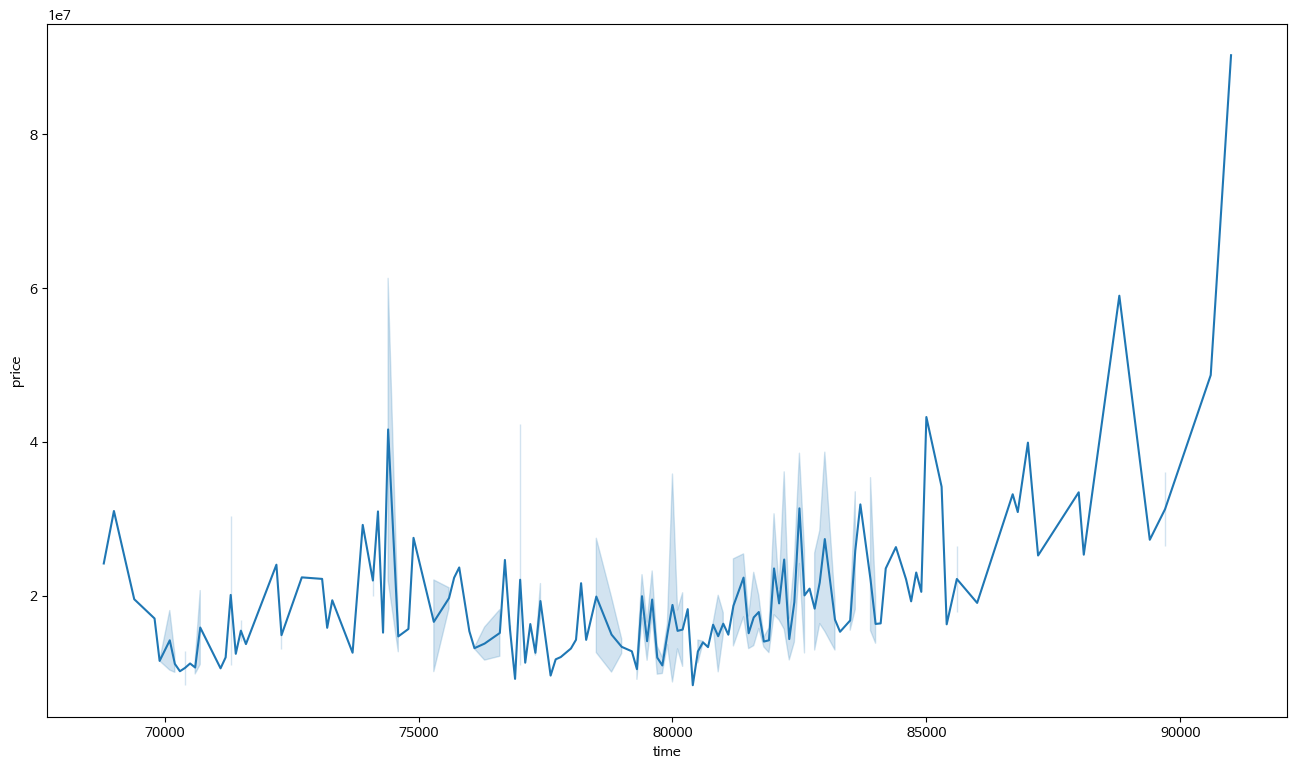

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks['Volume'], x=stocks['Close'])
plt.xlabel('time')
plt.ylabel('price')

Text(0, 0.5, 'price')

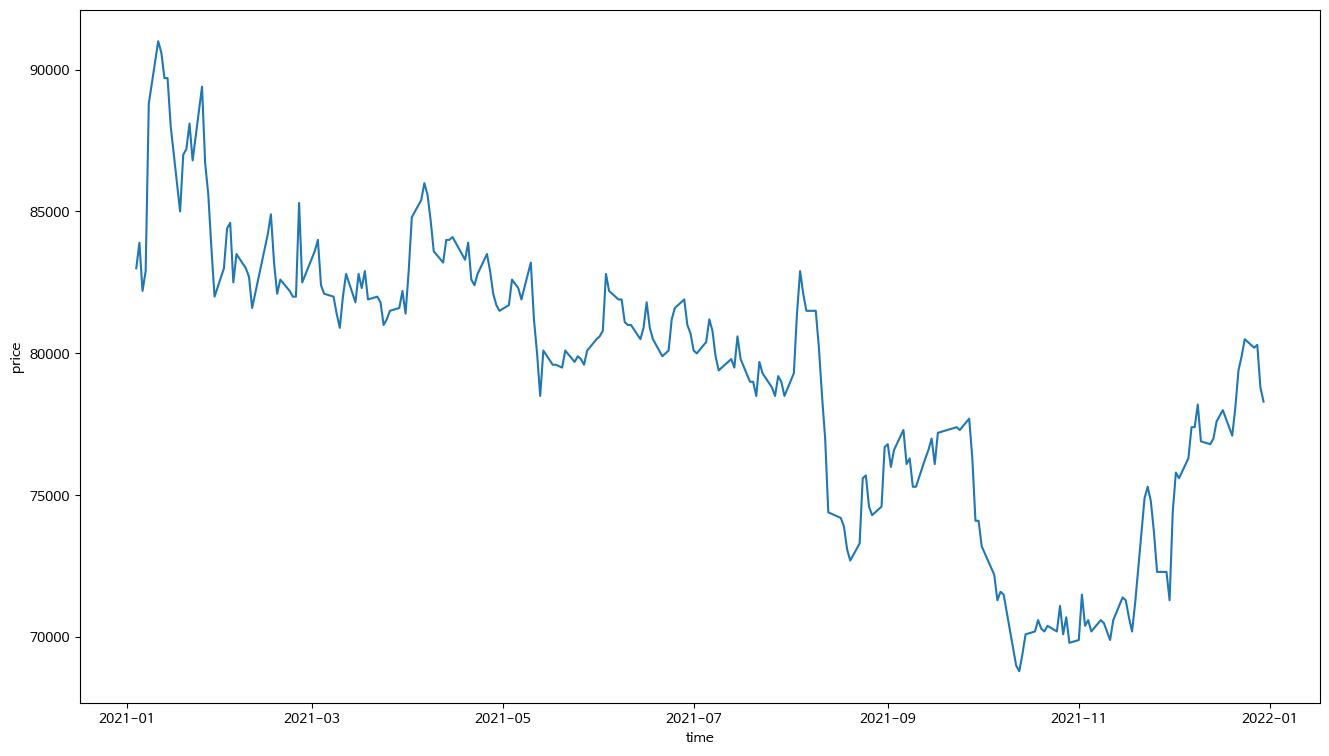

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stocks['Close'], x=stocks['date'])
plt.xlabel('time')
plt.ylabel('price')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

stocks.sort_index(ascending=False).reset_index(drop=True)

scaler = MinMaxScaler()
scale_cols =  ['Open', 'High', 'Low', 'Close', 'Volume', 'amount']
df_scaled = scaler.fit_transform(stocks[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,Open,High,Low,Close,Volume,amount
0,0.569444,0.544118,0.561321,0.639640,0.369920,0.562080
1,0.597222,0.525735,0.627358,0.680180,0.329425,0.431605
2,0.675926,0.547794,0.650943,0.603604,0.411808,0.138529
3,0.652778,0.536765,0.679245,0.635135,0.296598,0.409674
4,0.675926,0.750000,0.693396,0.900901,0.618264,1.000000
...,...,...,...,...,...,...
243,0.532407,0.411765,0.561321,0.527027,0.045812,0.400192
244,0.550926,0.404412,0.542453,0.513514,0.029916,0.294326
245,0.532407,0.397059,0.537736,0.518018,0.120712,0.341187
246,0.532407,0.389706,0.481132,0.450450,0.139845,0.153437


In [ ]:
#Window size: 과거 몇 기간의 데이터로 예측을 할 것인지 지정
TEST_SIZE = 20
WINDOW_SIZE = 10

train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
from sklearn.model_selection import train_test_split

feature_cols = ['Open', 'High', 'Low', 'Volume', 'amount']
label_cols = ['Close']

train_feature = train[feature_cols]
train_label = train[label_cols]

train_feature, train_label = make_dataset(train_feature, train_label, 10)

x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
x_train.shape, x_valid.shape

((174, 10, 5), (44, 10, 5))

In [ ]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature.shape, test_label.shape

test_feature, test_label = make_dataset(test_feature, test_label, 10)
test_feature.shape, test_label.shape

((10, 10, 5), (10, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM, GRU

model = Sequential()
model.add(GRU(16,
               input_shape=(train_feature.shape[1], train_feature.shape[2]),
               activation='relu',
               return_sequences=False)
          )
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(x_train, y_train,
                                    epochs=200,  #200
                                    batch_size=16,
                                    validation_data=(x_valid, y_valid))

Epoch 1/200
11/11 [==============================] - 11s 121ms/step - loss: 0.1845 - val_loss: 0.1767
Epoch 2/200
11/11 [==============================] - 1s 56ms/step - loss: 0.1129 - val_loss: 0.0891
Epoch 3/200
11/11 [==============================] - 1s 56ms/step - loss: 0.0486 - val_loss: 0.0265
Epoch 4/200
11/11 [==============================] - 1s 57ms/step - loss: 0.0148 - val_loss: 0.0066
Epoch 5/200
11/11 [==============================] - 1s 67ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 6/200
11/11 [==============================] - 1s 75ms/step - loss: 0.0098 - val_loss: 0.0058
Epoch 7/200
11/11 [==============================] - 1s 68ms/step - loss: 0.0084 - val_loss: 0.0061
Epoch 8/200
11/11 [==============================] - 1s 92ms/step - loss: 0.0078 - val_loss: 0.0056
Epoch 9/200
11/11 [==============================] - 1s 138ms/step - loss: 0.0072 - val_loss: 0.0051
Epoch 10/200
11/11 [==============================] - 1s 115ms/step - loss: 0.0066 - val_loss: 0.

In [ ]:
test_feature.shape

(10, 10, 5)

In [ ]:
pred = model.predict(test_feature)
pred.shape

1/1 [==============================] - 0s 178ms/step


(10, 1)

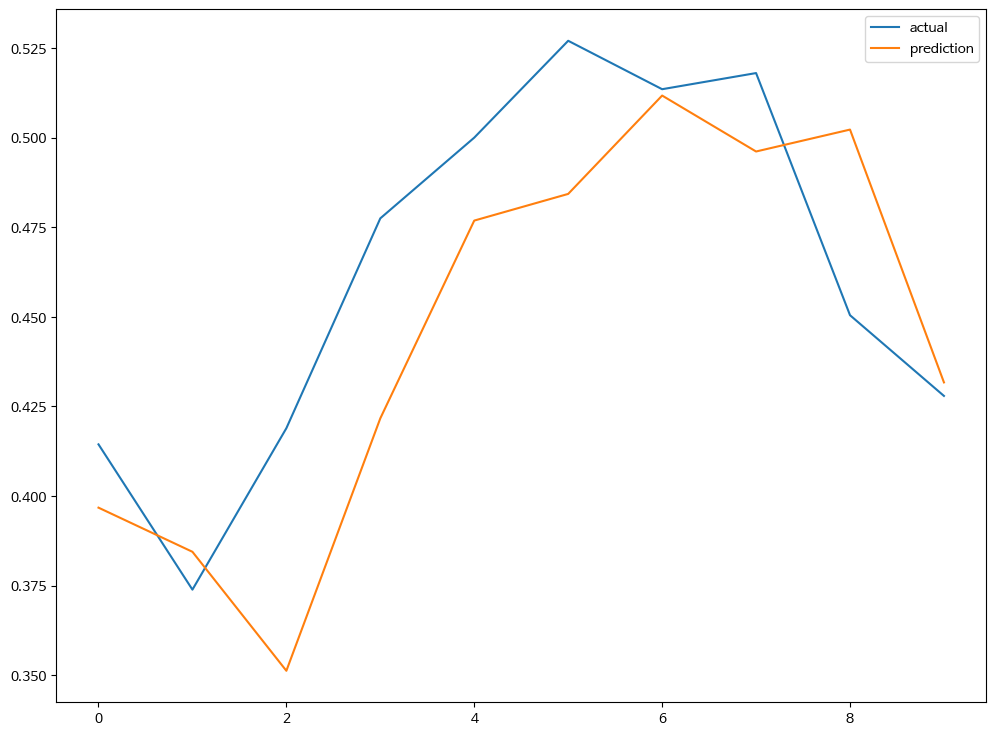

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()

##2. 하이퍼 파라미터 튜닝
 - DNN의 하이터파라미터: 층의 수, 노드의 수, 학습율, 배치크기 등
 - RadomizedSerachCV 또는 GridSearchCV 등 활용

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

In [ ]:
(img_train, label_train), (img_test, label_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
# Normalize pixel values between 0 and 1
img_train = img_train.astype('float32') / 255.0
img_test = img_test.astype('float32') / 255.0

- 하이퍼튜닝을 위한 모형 구축 시 하이퍼 파라미터 탐색 공간 정의
- 하이퍼 모델: 하이퍼튜닝을 위해 설정하는 모델

- 하이퍼 모형의 설정
 - 모델 빌더 함수 사용: Keras Tuner API의 HyperModel 클래스를 하위 클래스화
 - 컴파일된 모델을 반환하고 인라인으로 정의한 하이퍼파라미터를 사용하여 모델을 하이퍼튜닝

In [ ]:
def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28, 28)))

  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

- tuner 객체 만들고 튜닝 수행
 - randomsearch, hyperband, bayesianoptimization, sklearn 등의 tuner 가능
 - Hyperband 사용 시: objective와 epoch 지정

In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback): #조기 학습 중단을 위해 사용
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
#하이퍼 파라미터 탐색 실행
tuner.search(img_train, label_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
optimal number of units:  {best_hps.get('units')}
optimal learning rate for the optimizer:  {best_hps.get('learning_rate')}
""")

Trial 30 Complete [00h 01m 23s]
val_accuracy: 0.8552500009536743

Best val_accuracy So Far: 0.8822500109672546
Total elapsed time: 00h 12m 51s

optimal number of units:  448
optimal learning rate for the optimizer:  0.0001



In [ ]:
#탐색을 통해 찾은 하이퍼파라미터로 훈련 시 최적의 epoch을 발견
model = tuner.hypermodel.build(best_hps)
history = model.fit(img_train, label_train, epochs=50, validation_split=0.2)

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
1500/1500 [==============================] - 6s 3ms/step - loss: 0.6385 - accuracy: 0.7909 - val_loss: 0.4968 - val_accuracy: 0.8241
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4465 - accuracy: 0.8480 - val_loss: 0.4553 - val_accuracy: 0.8371
Epoch 3/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4022 - accuracy: 0.8623 - val_loss: 0.4123 - val_accuracy: 0.8547
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3761 - accuracy: 0.8700 - val_loss: 0.3755 - val_accuracy: 0.8682
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3567 - accuracy: 0.8736 - val_loss: 0.3697 - val_accuracy: 0.8706
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3407 - accuracy: 0.8814 - val_loss: 0.3643 - val_accuracy: 0.8717
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3278 - accuracy: 0.8836 - val_loss: 0.3485 - val_accuracy:

In [ ]:
#최적 모형 객체 만들기
hypermodel = tuner.hypermodel.build(best_hps)

# 최적 epoch으로 학습
hypermodel.fit(img_train, label_train, epochs=best_epoch, validation_split=0.2)

Epoch 1/49
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6289 - accuracy: 0.7958 - val_loss: 0.4756 - val_accuracy: 0.8413
Epoch 2/49
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4450 - accuracy: 0.8480 - val_loss: 0.4458 - val_accuracy: 0.8453
Epoch 3/49
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4025 - accuracy: 0.8615 - val_loss: 0.3962 - val_accuracy: 0.8629
Epoch 4/49
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3768 - accuracy: 0.8692 - val_loss: 0.3919 - val_accuracy: 0.8648
Epoch 5/49
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3580 - accuracy: 0.8754 - val_loss: 0.3706 - val_accuracy: 0.8712
Epoch 6/49
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3417 - accuracy: 0.8809 - val_loss: 0.3725 - val_accuracy: 0.8702
Epoch 7/49
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3295 - accuracy: 0.8839 - val_loss: 0.3510 - val_accuracy:

In [ ]:
eval_result = hypermodel.evaluate(img_test, label_test)
print("[test loss, test accuracy]:", eval_result)

313/313 [==============================] - 1s 3ms/step - loss: 0.3296 - accuracy: 0.8914
[test loss, test accuracy]: [0.3296207785606384, 0.8913999795913696]


In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.3 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras

def model_builder(hp):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(720, 1)))

  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(keras.layers.Dense(10))

  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

  return model

In [ ]:
import numpy as np
import pandas as pd
import keras_tuner as kt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv('AMZN.csv', header=0,index_col="Date")
arr = MinMaxScaler().fit_transform(data)[:,3]

x, y = make_sequence( arr, 3 )

x = x.reshape(-1, 3, 1)
y = y.reshape(-1, 1)
x_train = x[0:40]
x_test = x[40:]
y_train = y[0:40]
y_test = y[40:]

tuner = kt.Hyperband(model_builder,
                     #objective='val_accuracy',
                     objective='val_mean_squared_error',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

#하이퍼 파라미터 탐색 실행
tuner.search(x_train, y_train, epochs=50, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
optimal number of units:  {best_hps.get('units')}
optimal learning rate for the optimizer:  {best_hps.get('learning_rate')}
""")


Trial 26 Complete [00h 00m 02s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 00h 00m 51s

optimal number of units:  32
optimal learning rate for the optimizer:  0.01



In [ ]:
model = Sequential()
model.add(GRU(units = 32, activation = 'tanh', input_shape = (3, 1))) #units: output의 dimension, relu대신 tanh 사용
model.add(Dense(1, activation = 'linear'))
model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.fit(x_train, y_train, epochs=10)
print("LSTM - ", model.evaluate(x_test, y_test))

Epoch 1/10
2/2 [==============================] - 3s 11ms/step - loss: 0.0452
Epoch 2/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0328
Epoch 3/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0228
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0150
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0093
Epoch 6/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0057
Epoch 7/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0040
Epoch 8/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0037
Epoch 9/10
2/2 [==============================] - 0s 7ms/step - loss: 0.0044
Epoch 10/10
7/7 [==============================] - 0s 3ms/step - loss: 0.0122
LSTM -  0.012244701385498047


In [ ]:
!wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
!unzip /content/jena_climate_2009_2016.csv.zip

In [ ]:
import numpy as np
import pandas as pd
import keras_tuner as kt
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense, LSTM, GRU
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv('jena_climate_2009_2016.csv', header=0,index_col="Date Time")

In [ ]:
arr = MinMaxScaler().fit_transform(data)[:, 1]

x, y = make_sequence( arr, 720 )

x = x.reshape(-1, len(x), 1)
y = y.reshape(-1, len(y))

x_train = x[0: 321958]
y_train = y[0: 321958]
x_test = x[321958: ]
y_test = y[321958: ]

tuner = kt.Hyperband(model_builder,
                     #objective='val_accuracy',
                     objective='val_mean_squared_error',
                     max_epochs=100,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

#하이퍼 파라미터 탐색 실행
tuner.search(x_train, y_train, epochs=200, validation_split=0.2, callbacks=[tf.keras.callbacks.EarlyStopping(patience=1)])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
optimal number of units:  {best_hps.get('units')}
optimal learning rate for the optimizer:  {best_hps.get('learning_rate')}
""")


optimal number of units:  96
optimal learning rate for the optimizer:  0.001



In [ ]:
model = Sequential()
model.add(GRU(units = 96, activation = 'tanh', input_shape = (720, 1))) #units: output의 dimension, relu대신 tanh 사용
model.compile(optimizer = 'adam', loss = 'mse')  #mean squared error
model.fit(x_test, y_test, epochs=10)
print("LSTM - ", model.evaluate(x_test, y_test))